## DataSet
[kaggle]()

## Project summary
* customer segmentation using kMeans clustering 

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Mall_Customers.csv',index_col = 0)

In [5]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

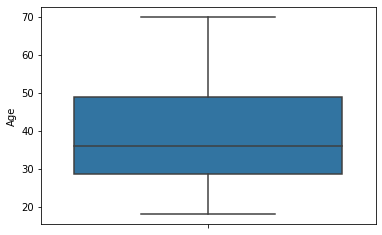

In [11]:
sns.boxplot(y='Age',data=df)

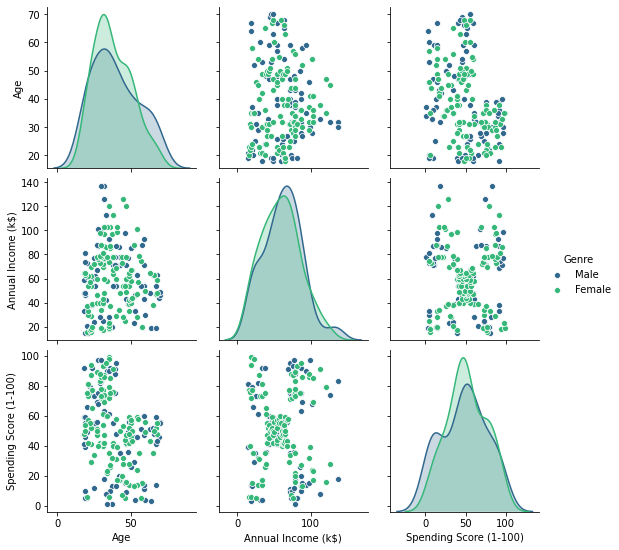

In [19]:
sns.pairplot(df,hue='Genre',palette='viridis')

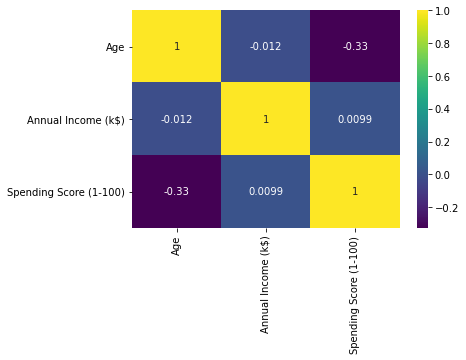

In [17]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

## individual plots

In [20]:
Females = df[df.Genre=='Female']
Males = df[df.Genre=='Male']

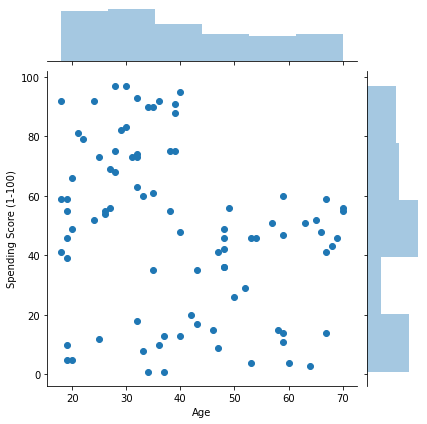

In [23]:
sns.jointplot(data = Males, x = 'Age',y = 'Spending Score (1-100)')

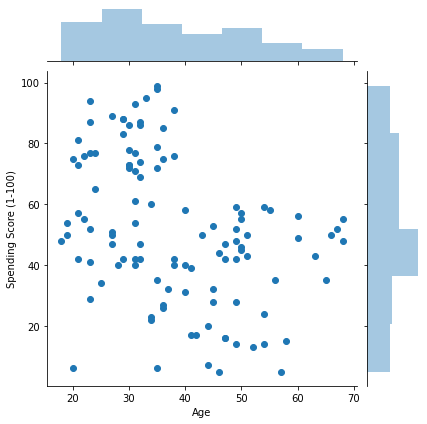

In [24]:
sns.jointplot(data = Females, x = 'Age',y = 'Spending Score (1-100)')

In [27]:
df.corrwith(df['Annual Income (k$)'])

Age                      -0.012398
Annual Income (k$)        1.000000
Spending Score (1-100)    0.009903
dtype: float64

In [30]:
new_data = pd.get_dummies(df,columns=['Genre'],drop_first=True)

In [32]:
new_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


## Models

In [35]:
from sklearn.cluster import KMeans

In [38]:
## elbow method
err = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(new_data)
    err.append(kmeans.inertia_)
    

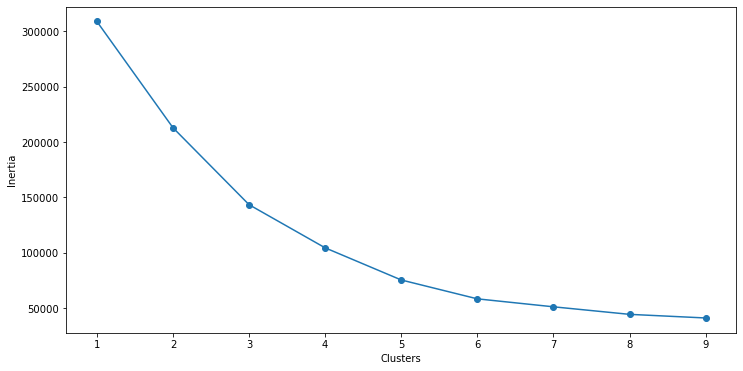

In [39]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10),err,marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
## from here , the ideal cluster lies between 4 and 5 clusters 
# lets use 5 

kmeans = KMeans(n_clusters=5).fit(new_data)


In [42]:
kmeans.cluster_centers_

array([[25.52173913, 26.30434783, 78.56521739,  0.39130435],
       [40.66666667, 87.75      , 17.58333333,  0.52777778],
       [45.2173913 , 26.30434783, 20.91304348,  0.39130435],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [43.08860759, 55.29113924, 49.56962025,  0.41772152]])

In [43]:
kmeans.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [44]:
## lets add this to our data frame
new_data['labels'] = kmeans.labels_

## Further EDA

In [45]:
new_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,labels
CustomerID,,,,,
1,19,15,39,1,2
2,21,15,81,1,0
3,20,16,6,0,2
4,23,16,77,0,0
5,31,17,40,0,2


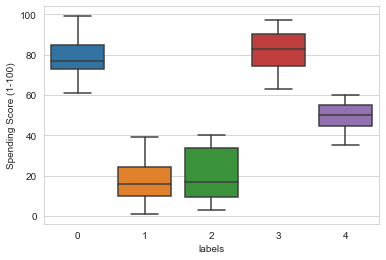

In [51]:
sns.set_style('whitegrid')
sns.boxplot(x ='labels' ,y ='Spending Score (1-100)',data=new_data)

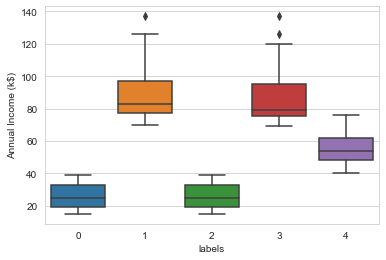

In [52]:
sns.boxplot(x ='labels' ,y ='Annual Income (k$)',data=new_data)

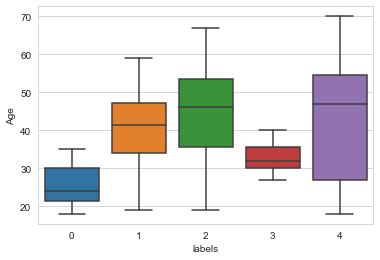

In [53]:
sns.boxplot(x ='labels' ,y ='Age',data=new_data)

In [54]:
new_data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male',
       'labels'],
      dtype='object')

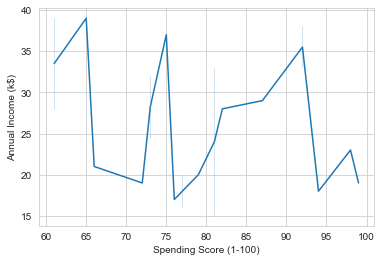

In [56]:
sns.lineplot(x='Spending Score (1-100)',y = 'Annual Income (k$)',data = new_data[new_data['labels']==0])

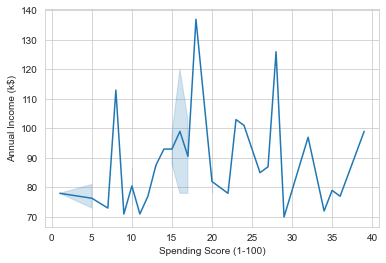

In [57]:
sns.lineplot(x='Spending Score (1-100)',y = 'Annual Income (k$)',data = new_data[new_data['labels']==1])